# Iceland Tourism 2023

## Data Preparation

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #Suppress the warnings

In [2]:
#Select excel file
file_path= '2023.xlsx'
#Read one sheet of excel file to get the nationalities and ages of tourists.
df_nationality= pd.read_excel(file_path, sheet_name= 'Profile', header= 0, usecols= [1,2,3,4,5,6], skiprows= 62, nrows=22)
#Define name of the columns
df_nationality.columns= ['Nationality', '< 24 years', '25-34 years', '35-44 years', '45-54 years', '> 55 years']

In [3]:
df_nationality.head()

Nationality  < 24 years  25-34 years  35-44 years  45-54 years  > 55 years
0         All    0.142150     0.339057     0.171023     0.153465    0.194304
1   Australia    0.110849     0.302141     0.103709     0.158044    0.325257
2     Austria    0.282675     0.321554     0.069455     0.240789    0.085527
3     Belgium    0.139197     0.369868     0.117891     0.192615    0.180429
4      Canada    0.129904     0.287536     0.149458     0.193538    0.239564

In [4]:
#Read the 'Profile' sheet of the excel to get the income of each nationality
df_income= pd.read_excel(file_path, sheet_name= 'Profile', header= 0, usecols= [1,2,3,4,5,6], skiprows= 121, nrows=22)
df_income.columns= ['Nationality', 'Low', 'Low average', 'Average', 'High average', 'High']

In [6]:
df_income.head()

Nationality       Low  Low average   Average  High average      High
0         All  0.025363     0.066323  0.382426      0.382264  0.143624
1   Australia  0.015865     0.053372  0.301044      0.445507  0.184212
2     Austria  0.027573     0.076623  0.347126      0.401308  0.147371
3     Belgium  0.005114     0.013144  0.361876      0.489186  0.130681
4      Canada  0.017651     0.077567  0.340626      0.418667  0.145489

In [11]:
#Read the 'Length of stay' sheet from excel
df_stay= pd.read_excel(file_path, sheet_name= 'Length of stay, accommodation', header= 0, usecols= [1,2,3,4,5,6,7,8], skiprows= 2, nrows=22)
df_stay.columns= ['Nationality', 'Did not stay overnight',	'1 night',	'2-3 nights',
                         '4-5 nights',	'6-8 nights',	'9-12 nights',	'>13 nights']

In [12]:
df_stay.head()

Nationality  Did not stay overnight   1 night  2-3 nights  4-5 nights  \
0         All                0.011247  0.018377    0.149210    0.234543   
1   Australia                0.000000  0.000000    0.092019    0.200428   
2     Austria                0.000000  0.006337    0.158199    0.153722   
3     Belgium                0.000000  0.004534    0.046357    0.117975   
4      Canada                0.030089  0.011997    0.157707    0.145329   

   6-8 nights  9-12 nights  >13 nights  
0    0.320000     0.173708    0.092915  
1    0.386516     0.191317    0.129719  
2    0.241868     0.311261    0.128613  
3    0.335201     0.184989    0.310945  
4    0.291163     0.255632    0.108083

In [15]:
#Merge 3 dataframe into one
df_final= pd.merge(df_nationality, df_stay, on='Nationality')
df_final= pd.merge(df_final, df_income, on='Nationality')

In [17]:
#See the merged dataframe 
df_final.head()

Nationality  < 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
0         All    0.142150     0.339057     0.171023     0.153465    0.194304   
1   Australia    0.110849     0.302141     0.103709     0.158044    0.325257   
2     Austria    0.282675     0.321554     0.069455     0.240789    0.085527   
3     Belgium    0.139197     0.369868     0.117891     0.192615    0.180429   
4      Canada    0.129904     0.287536     0.149458     0.193538    0.239564   

   Did not stay overnight   1 night  2-3 nights  4-5 nights  6-8 nights  \
0                0.011247  0.018377    0.149210    0.234543    0.320000   
1                0.000000  0.000000    0.092019    0.200428    0.386516   
2                0.000000  0.006337    0.158199    0.153722    0.241868   
3                0.000000  0.004534    0.046357    0.117975    0.335201   
4                0.030089  0.011997    0.157707    0.145329    0.291163   

   9-12 nights  >13 nights       Low  Low average   Average  High average  \
0     0.173708    0.092915  0.025363     0.066323  0.382426      0.382264   
1     0.191317    0.129719  0.015865     0.053372  0.301044      0.445507   
2     0.311261    0.128613  0.027573     0.076623  0.347126      0.401308   
3     0.184989    0.310945  0.005114     0.013144  0.361876      0.489186   
4     0.255632    0.108083  0.017651     0.077567  0.340626      0.418667   

       High  
0  0.143624  
1  0.184212  
2  0.147371  
3  0.130681  
4  0.145489

In [19]:
#Set Nationality as the new index
df_final= df_final.set_index('Nationality')

In [21]:
#Check the dataframe
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
All            0.142150     0.339057     0.171023     0.153465    0.194304   
Australia      0.110849     0.302141     0.103709     0.158044    0.325257   
Austria        0.282675     0.321554     0.069455     0.240789    0.085527   
Belgium        0.139197     0.369868     0.117891     0.192615    0.180429   
Canada         0.129904     0.287536     0.149458     0.193538    0.239564   

             Did not stay overnight   1 night  2-3 nights  4-5 nights  \
Nationality                                                             
All                        0.011247  0.018377    0.149210    0.234543   
Australia                  0.000000  0.000000    0.092019    0.200428   
Austria                    0.000000  0.006337    0.158199    0.153722   
Belgium                    0.000000  0.004534    0.046357    0.117975   
Canada                     0.030089  0.011997    0.157707    0.145329   

             6-8 nights  9-12 nights  >13 nights       Low  Low average  \
Nationality                                                               
All            0.320000     0.173708    0.092915  0.025363     0.066323   
Australia      0.386516     0.191317    0.129719  0.015865     0.053372   
Austria        0.241868     0.311261    0.128613  0.027573     0.076623   
Belgium        0.335201     0.184989    0.310945  0.005114     0.013144   
Canada         0.291163     0.255632    0.108083  0.017651     0.077567   

              Average  High average      High  
Nationality                                    
All          0.382426      0.382264  0.143624  
Australia    0.301044      0.445507  0.184212  
Austria      0.347126      0.401308  0.147371  
Belgium      0.361876      0.489186  0.130681  
Canada       0.340626      0.418667  0.145489

In [23]:
#Drop the 'All' column
df_final= df_final.drop(['All'])

In [25]:
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia      0.110849     0.302141     0.103709     0.158044    0.325257   
Austria        0.282675     0.321554     0.069455     0.240789    0.085527   
Belgium        0.139197     0.369868     0.117891     0.192615    0.180429   
Canada         0.129904     0.287536     0.149458     0.193538    0.239564   
China          0.420936     0.339237     0.096019     0.057880    0.085928   

             Did not stay overnight   1 night  2-3 nights  4-5 nights  \
Nationality                                                             
Australia                  0.000000  0.000000    0.092019    0.200428   
Austria                    0.000000  0.006337    0.158199    0.153722   
Belgium                    0.000000  0.004534    0.046357    0.117975   
Canada                     0.030089  0.011997    0.157707    0.145329   
China                      0.000000  0.004825    0.107628    0.298742   

             6-8 nights  9-12 nights  >13 nights       Low  Low average  \
Nationality                                                               
Australia      0.386516     0.191317    0.129719  0.015865     0.053372   
Austria        0.241868     0.311261    0.128613  0.027573     0.076623   
Belgium        0.335201     0.184989    0.310945  0.005114     0.013144   
Canada         0.291163     0.255632    0.108083  0.017651     0.077567   
China          0.367947     0.153513    0.067344  0.003241     0.051416   

              Average  High average      High  
Nationality                                    
Australia    0.301044      0.445507  0.184212  
Austria      0.347126      0.401308  0.147371  
Belgium      0.361876      0.489186  0.130681  
Canada       0.340626      0.418667  0.145489  
China        0.471385      0.367208  0.106750

In [27]:
#Round the values of the dataframe to 2 digits 
df_final= df_final.round(2)
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  9-12 nights  >13 nights   Low  Low average  Average  \
Nationality                                                                    
Australia          0.39         0.19        0.13  0.02         0.05     0.30   
Austria            0.24         0.31        0.13  0.03         0.08     0.35   
Belgium            0.34         0.18        0.31  0.01         0.01     0.36   
Canada             0.29         0.26        0.11  0.02         0.08     0.34   
China              0.37         0.15        0.07  0.00         0.05     0.47   

             High average  High  
Nationality                      
Australia            0.45  0.18  
Austria              0.40  0.15  
Belgium              0.49  0.13  
Canada               0.42  0.15  
China                0.37  0.11

In [29]:
#See how many observatiosn and columns the data has
df_final.shape

(21, 17)

In [31]:
#See the data type of each column
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Australia to USA
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   < 24 years              21 non-null     float64
 1   25-34 years             21 non-null     float64
 2   35-44 years             21 non-null     float64
 3   45-54 years             21 non-null     float64
 4   > 55 years              21 non-null     float64
 5   Did not stay overnight  21 non-null     float64
 6   1 night                 21 non-null     float64
 7   2-3 nights              21 non-null     float64
 8   4-5 nights              21 non-null     float64
 9   6-8 nights              21 non-null     float64
 10  9-12 nights             21 non-null     float64
 11  >13 nights              21 non-null     float64
 12  Low                     21 non-null     float64
 13  Low average             21 non-null     float64
 14  Average                 21 non-null     

In [40]:
#Check the statistical values of the dataframe
df_final.describe()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
count   21.000000    21.000000    21.000000    21.000000   21.000000   
mean     0.151429     0.357619     0.159048     0.155238    0.177143   
std      0.078440     0.110721     0.048156     0.050361    0.086437   
min      0.060000     0.230000     0.070000     0.060000    0.030000   
25%      0.110000     0.280000     0.120000     0.120000    0.100000   
50%      0.130000     0.350000     0.160000     0.160000    0.190000   
75%      0.170000     0.380000     0.170000     0.190000    0.240000   
max      0.420000     0.690000     0.250000     0.240000    0.330000   

       Did not stay overnight    1 night  2-3 nights  4-5 nights  6-8 nights  \
count               21.000000  21.000000   21.000000   21.000000   21.000000   
mean                 0.005714   0.007143    0.132381    0.218095    0.332857   
std                  0.009258   0.009562    0.087058    0.122418    0.107198   
min                  0.000000   0.000000    0.030000    0.090000    0.130000   
25%                  0.000000   0.000000    0.060000    0.120000    0.290000   
50%                  0.000000   0.010000    0.140000    0.160000    0.350000   
75%                  0.010000   0.010000    0.160000    0.300000    0.390000   
max                  0.030000   0.040000    0.330000    0.550000    0.590000   

       9-12 nights  >13 nights        Low  Low average    Average  \
count    21.000000   21.000000  21.000000    21.000000  21.000000   
mean      0.188095    0.114286   0.032381     0.064286   0.385714   
std       0.100778    0.075071   0.027369     0.028385   0.061202   
min       0.060000    0.020000   0.000000     0.010000   0.290000   
25%       0.110000    0.060000   0.010000     0.050000   0.350000   
50%       0.180000    0.100000   0.020000     0.070000   0.360000   
75%       0.260000    0.130000   0.060000     0.080000   0.410000   
max       0.360000    0.310000   0.100000     0.130000   0.530000   

       High average       High  
count     21.000000  21.000000  
mean       0.387143   0.132857  
std        0.047449   0.029857  
min        0.290000   0.090000  
25%        0.360000   0.110000  
50%        0.390000   0.120000  
75%        0.410000   0.150000  
max        0.490000   0.180000

In [42]:
#Check if there are any missing values
df_final.isnull().sum()

< 24 years                0
25-34 years               0
35-44 years               0
45-54 years               0
> 55 years                0
Did not stay overnight    0
1 night                   0
2-3 nights                0
4-5 nights                0
6-8 nights                0
9-12 nights               0
>13 nights                0
Low                       0
Low average               0
Average                   0
High average              0
High                      0
dtype: int64

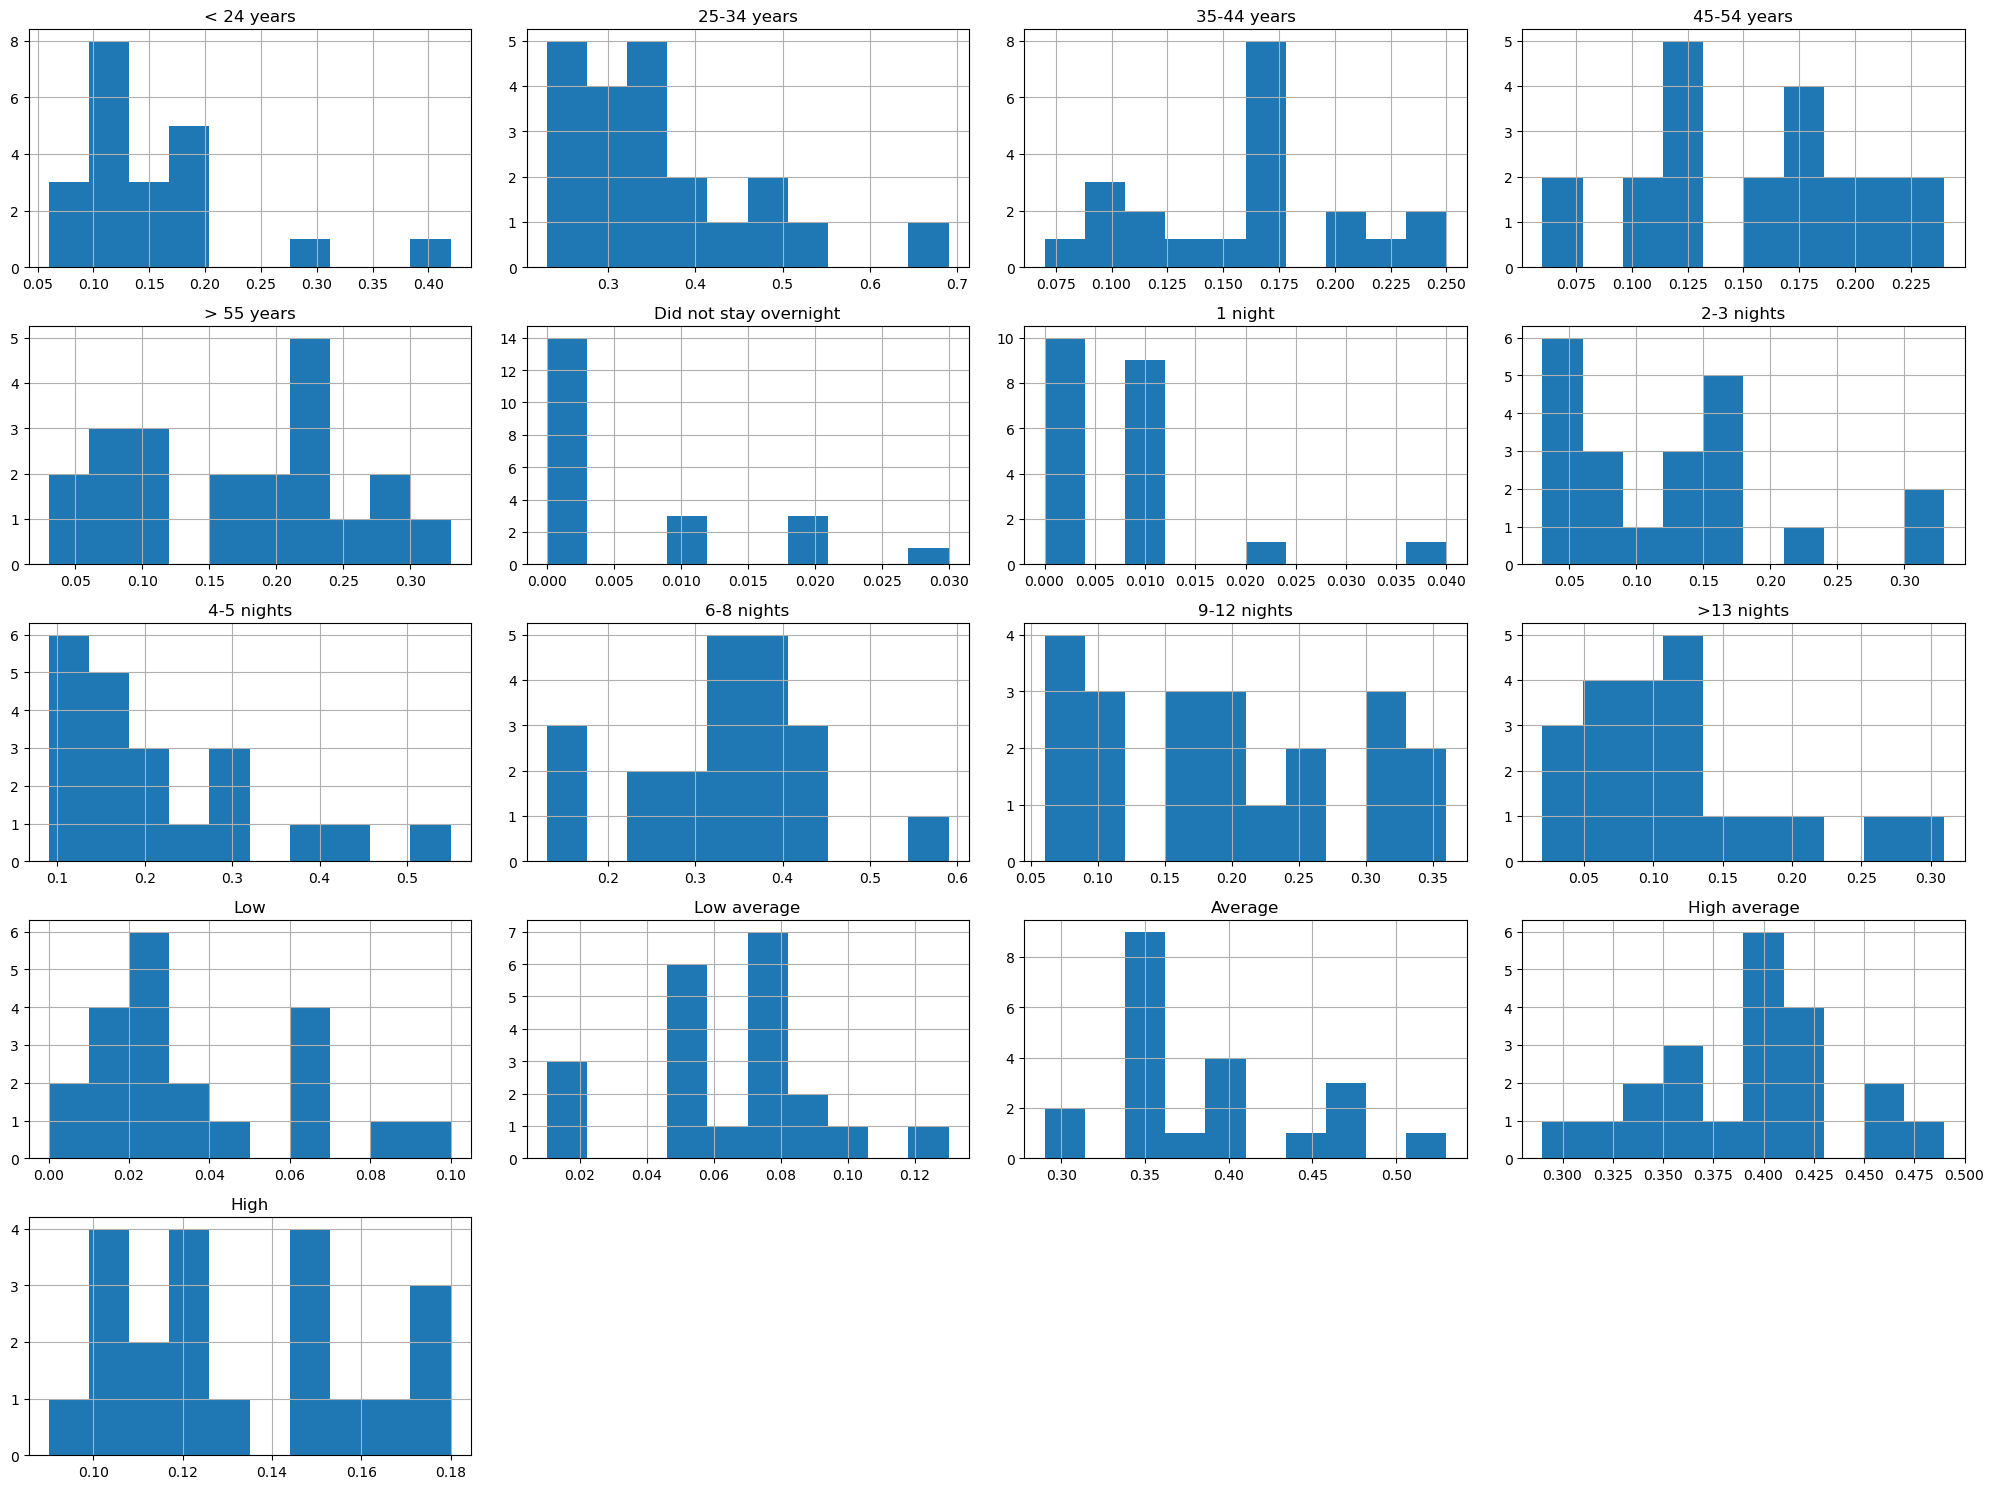

In [44]:
#Visualisation of the distribution of each column 
df_final.hist(bins=10, figsize=(20,15))
plt.tight_layout()
plt.show()

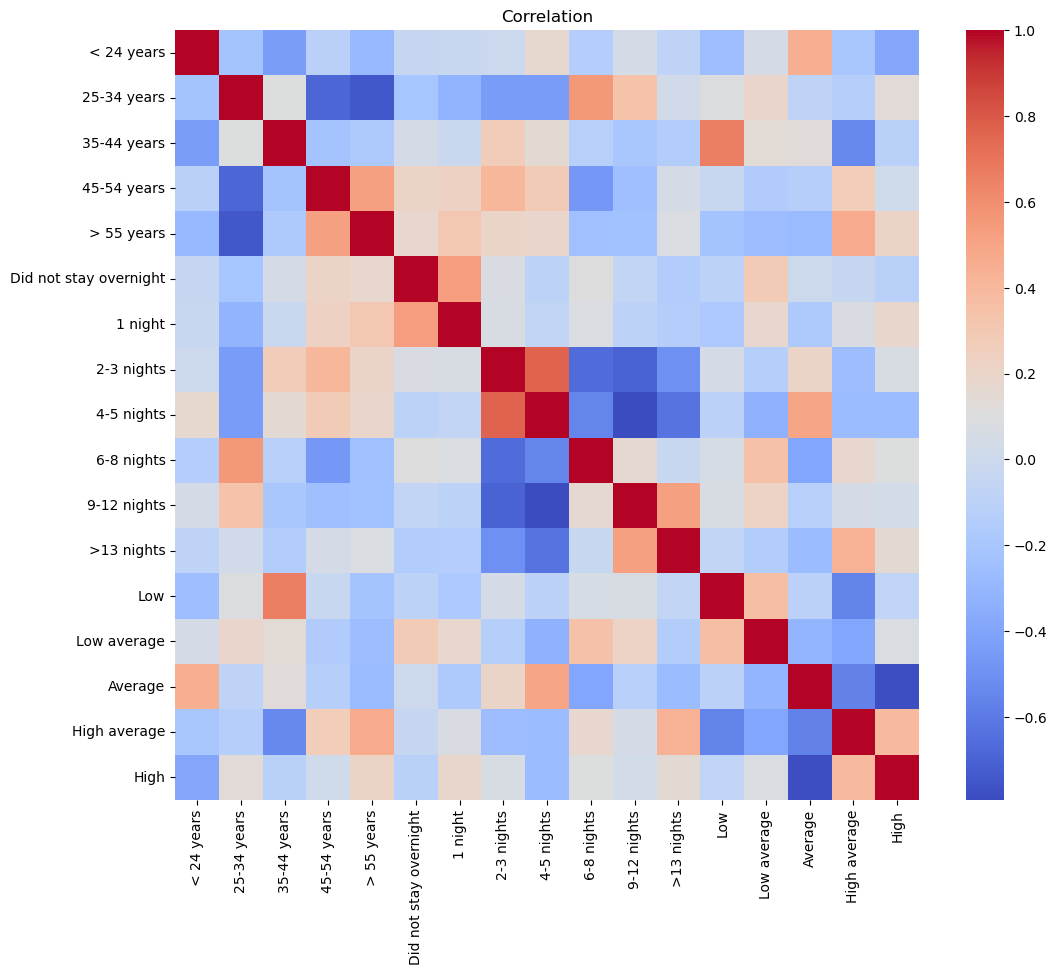

In [46]:
#Heatmap of the correlation between columns
plt.figure(figsize=(12,10))
sns.heatmap(df_final.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation')
plt.show()

## Clustering

I created a copy of the dataset to proceed with the clustering without alreting the original data.

In [50]:
#Make a copy of the dataframe
df_clustering=df_final.copy()

In [52]:
df_clustering.head(22)

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                     
Australia             0.11         0.30         0.10         0.16        0.33   
Austria               0.28         0.32         0.07         0.24        0.09   
Belgium               0.14         0.37         0.12         0.19        0.18   
Canada                0.13         0.29         0.15         0.19        0.24   
China                 0.42         0.34         0.10         0.06        0.09   
Denmark               0.20         0.24         0.12         0.22        0.23   
Finland               0.14         0.24         0.23         0.15        0.24   
France                0.13         0.35         0.16         0.18        0.17   
Germany               0.18         0.35         0.17         0.11        0.19   
India                 0.06         0.69         0.16         0.06        0.03   
Ireland               0.17         0.35         0.21         0.17        0.10   
Italy                 0.17         0.48         0.17         0.11        0.08   
Netherlands           0.13         0.36         0.14         0.13        0.23   
Norway                0.06         0.23         0.24         0.21        0.26   
Poland                0.14         0.43         0.25         0.13        0.05   
Portugal              0.08         0.52         0.16         0.12        0.11   
Spain                 0.13         0.46         0.20         0.12        0.10   
Sweden                0.12         0.28         0.10         0.23        0.28   
Switzerland           0.11         0.38         0.17         0.13        0.20   
United Kingdom        0.17         0.26         0.16         0.18        0.23   
USA                   0.11         0.27         0.16         0.17        0.29   

                Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                               
Australia                         0.00     0.00        0.09        0.20   
Austria                           0.00     0.01        0.16        0.15   
Belgium                           0.00     0.00        0.05        0.12   
Canada                            0.03     0.01        0.16        0.15   
China                             0.00     0.00        0.11        0.30   
Denmark                           0.02     0.02        0.15        0.25   
Finland                           0.00     0.01        0.17        0.32   
France                            0.00     0.01        0.04        0.12   
Germany                           0.01     0.01        0.06        0.10   
India                             0.00     0.00        0.14        0.15   
Ireland                           0.00     0.00        0.24        0.55   
Italy                             0.01     0.00        0.08        0.15   
Netherlands                       0.00     0.01        0.08        0.16   
Norway                            0.00     0.00        0.33        0.31   
Poland                            0.02     0.01        0.16        0.19   
Portugal                          0.00     0.01        0.03        0.12   
Spain                             0.00     0.00        0.05        0.09   
Sweden                            0.01     0.00        0.17        0.38   
Switzerland                       0.00     0.00        0.03        0.12   
United Kingdom                    0.00     0.01        0.33        0.43   
USA                               0.02     0.04        0.15        0.22   

                6-8 nights  9-12 nights  >13 nights   Low  Low average  \
Nationality                                                              
Australia             0.39         0.19        0.13  0.02         0.05   
Austria               0.24         0.31        0.13  0.03         0.08   
Belgium               0.34         0.18        0.31  0.01         0.01   
Canada                0.29         0.26        0.11  0.0

### K Means

In [54]:
#Set 'X' as the dataframe to apply it in the clustering
X= df_clustering

In [56]:
from sklearn.cluster import KMeans
# Function to perform KMeans clustering and calculate metrics
def perform_clustering(n_clusters, X):
    KMeans_clustering = KMeans(n_clusters=n_clusters, random_state= 42)
    labels = KMeans_clustering.fit_predict(X)  #training of the data
    db_index = davies_bouldin_score(X, labels)  #david score
    silhouette_avg = silhouette_score(X, labels)  #silhouette score
    return db_index, silhouette_avg

In [274]:
#Import davied-boulding index and silhouette score 
from sklearn.metrics import davies_bouldin_score, silhouette_score
# Vary the number of clusters and store metrics
cluster_range = range(2, 5)  #Check optimal clusters from 2 to 5 clusters
db_scores = []
silhouette_scores = []

for n_clusters in cluster_range:
    db_index, silhouette_avg = perform_clustering(n_clusters, X)
    db_scores.append(db_index)
    silhouette_scores.append(silhouette_avg)

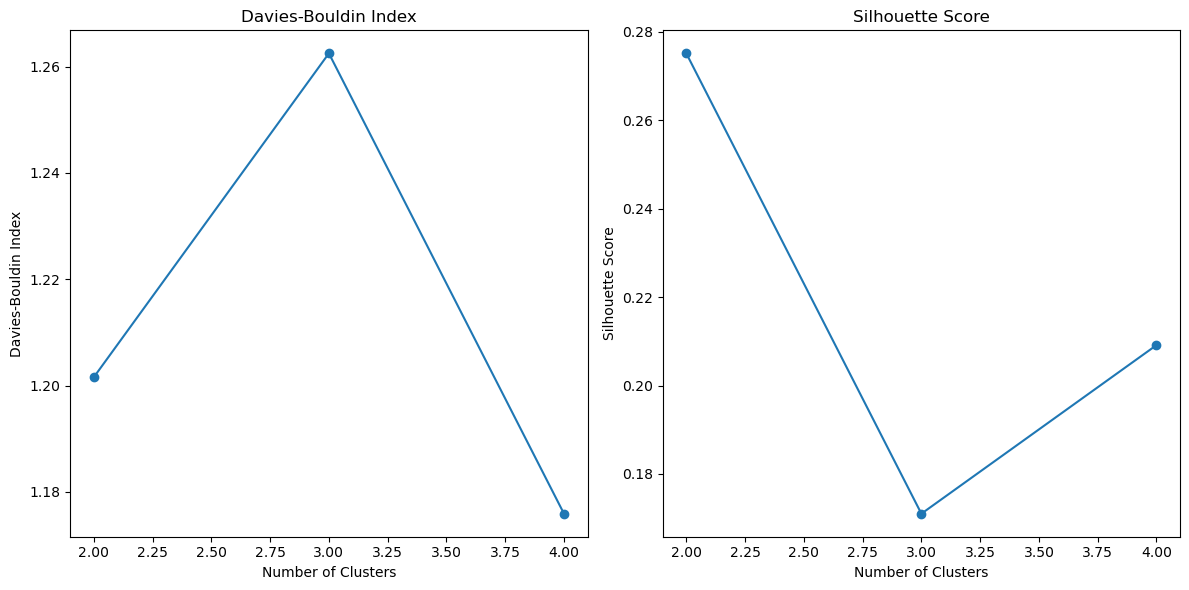

In [276]:
# Plot Davies-Bouldin method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Plot the Silhouette method
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [302]:
# Initialise k_means by calling an object KMeans() using 2 clusters
k_means = KMeans(n_clusters = 4, random_state = 42)

# Train the model using fit() method
k_means.fit(X)

KMeans(n_clusters=4, random_state=42)

In [304]:
# Create an additional column in the dataframe (df) as KMeans_labels to see on which cluster belong each point of the data
df_final['KMeans_labels'] = k_means.labels_

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  ...       PC2       PC3  HR_labels    PC1_HR  \
Nationality              ...                                            
Australia          0.39  ... -0.152703  0.135892          0 -0.016969   
Austria            0.24  ... -0.078385 -0.179171          0 -0.033501   
Belgium            0.34  ... -0.140654  0.001907          0 -0.126347   
Canada             0.29  ... -0.135594  0.000061          0 -0.004618   
China              0.37  ...  0.140129 -0.153682          0  0.049324   

               PC2_HR    PC3_HR  DBSCAN_labels  DBSCAN_opt_labels    PC1_DB  \
Nationality                                                                   
Australia   -0.152703  0.135892              0                  0 -0.016969   
Austria     -0.078385 -0.179171              0                  0 -0.033501   
Belgium     -0.140654  0.001907              0                  0 -0.126347   
Canada      -0.135594  0.000061              0                  0 -0.004618   
China        0.140129 -0.153682              0                 -1  0.049324   

               PC2_DB  
Nationality            
Australia   -0.152703  
Austria     -0.078385  
Belgium     -0.140654  
Canada      -0.135594  
China        0.140129  

[5 rows x 29 columns]

In [306]:
#Import PCA for dimension reduction to plot the clusters
from sklearn.decomposition import PCA
#PCA for KMeans using 3 components (3 dimensions)
pca_KM = PCA(n_components= 3)
X_pca_KM = pca_KM.fit_transform(X)
#Create two new features
df_final['PC1']= X_pca_KM[:,0]
df_final['PC2']= X_pca_KM[:,1]
df_final['PC3']= X_pca_KM[:,2]

In [308]:
#Print the total variance to see how much of the original data is after applied pca.
total_var = pca_KM.explained_variance_ratio_.sum() * 100
total_var

76.61567724081738

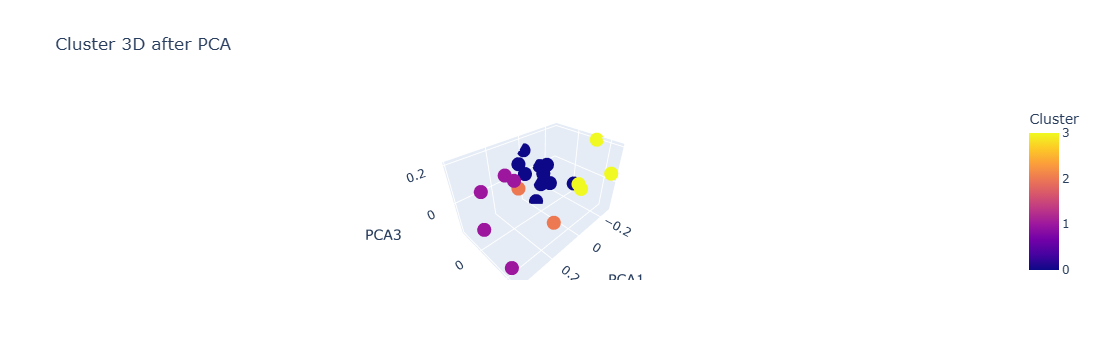

In [310]:
import plotly.express as px

df_pca=pd.DataFrame(X_pca_KM, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca['Cluster']= df_final['KMeans_labels']
df_pca['Nationality']= df_final.index

fig= px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [312]:
df_pca

PCA1      PCA2      PCA3  Cluster     Nationality
Nationality                                                          
Australia      -0.016969 -0.152703  0.135892        0       Australia
Austria        -0.033501 -0.078385 -0.179171        0         Austria
Belgium        -0.126347 -0.140654  0.001907        0         Belgium
Canada         -0.004618 -0.135594  0.000061        0          Canada
China           0.049324  0.140129 -0.153682        2           China
Denmark         0.122830 -0.040721  0.009000        2         Denmark
Finland         0.170706 -0.008040  0.092389        1         Finland
France         -0.144318 -0.126989 -0.051799        0          France
Germany        -0.134369 -0.138204 -0.131071        0         Germany
India          -0.245502  0.255434  0.065819        3           India
Ireland         0.384580  0.215958 -0.123855        1         Ireland
Italy          -0.176560  0.133858 -0.054418        3           Italy
Netherlands    -0.094718 -0.051239  0.056766        0     Netherlands
Norway          0.301660 -0.091000  0.053157        1          Norway
Poland         -0.060737  0.189657  0.058072        3          Poland
Portugal       -0.271978  0.128754  0.203158        3        Portugal
Spain          -0.236576  0.040350 -0.090132        0           Spain
Sweden          0.215892 -0.011635  0.138541        1          Sweden
Switzerland    -0.159484 -0.083999 -0.109336        0     Switzerland
United Kingdom  0.385707  0.043156 -0.032521        1  United Kingdom
USA             0.074981 -0.088134  0.111222        0             USA

In [314]:
#PCA for KMeans using 2 components (2 dimensions)
pca_KM = PCA(n_components= 2)
X_pca_KM = pca_KM.fit_transform(X)
#Create two new features
df_final['PC1']= X_pca_KM[:,0]
df_final['PC2']= X_pca_KM[:,1]

In [316]:
#Print the total variance to see how much of the original data is after applied pca.
total_var = pca_KM.explained_variance_ratio_.sum() * 100
total_var

63.79743366317469

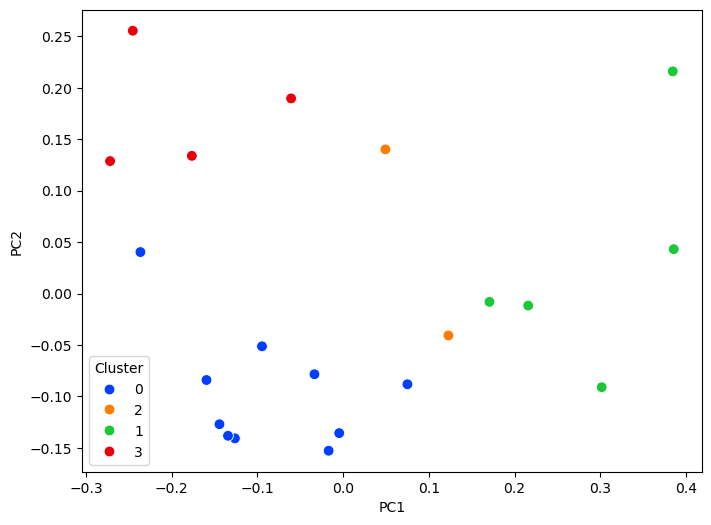

In [318]:
#Plot the clusters using the 2 features after applied pca
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='PC1', y='PC2', hue= df_final['KMeans_labels'].astype(str), s=60, palette='bright') 
plt.legend(title= 'Cluster')
plt.show()

In [320]:
#Display how many point are on each cluster
df_final['KMeans_labels'].value_counts()

KMeans_labels
0    10
1     5
3     4
2     2
Name: count, dtype: int64

In [322]:
#Print the cluster center values
print(k_means.cluster_centers_)

[[0.145  0.345  0.144  0.162  0.202  0.006  0.009  0.087  0.143  0.327
  0.264  0.161  0.028  0.061  0.366  0.409  0.14  ]
 [0.132  0.272  0.188  0.188  0.222  0.002  0.004  0.248  0.398  0.224
  0.066  0.058  0.04   0.052  0.41   0.374  0.124 ]
 [0.31   0.29   0.11   0.14   0.16   0.01   0.01   0.13   0.275  0.365
  0.13   0.085  0.01   0.055  0.465  0.365  0.105 ]
 [0.1125 0.53   0.185  0.105  0.0675 0.0075 0.005  0.1025 0.1525 0.4675
  0.18   0.0825 0.045  0.0925 0.365  0.36   0.14  ]]


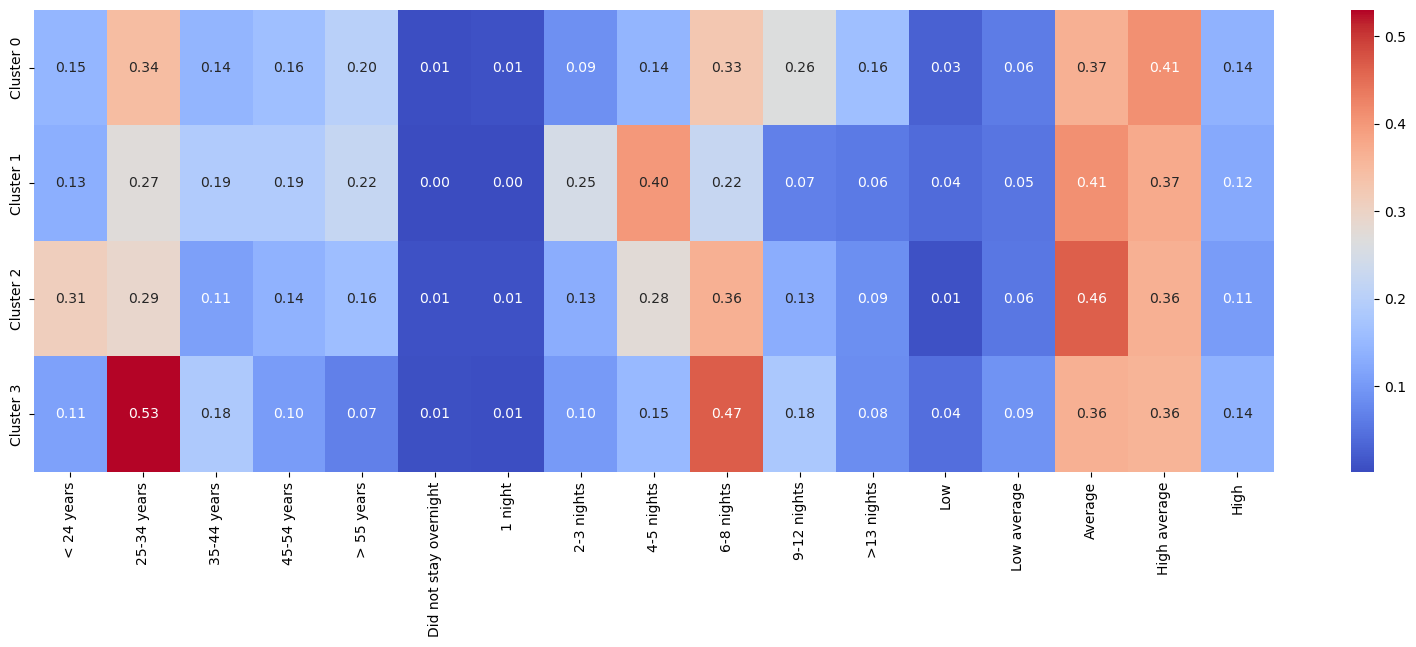

In [324]:
#Visualisation of the heatmap to understand the clusters
centroids= pd.DataFrame(k_means.cluster_centers_, columns= X.columns)
centroids.index= [f'Cluster {i}' for i in range(len(centroids))]

plt.figure(figsize=(20,6))
sns.heatmap(centroids, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

### Hierarchical Clustering

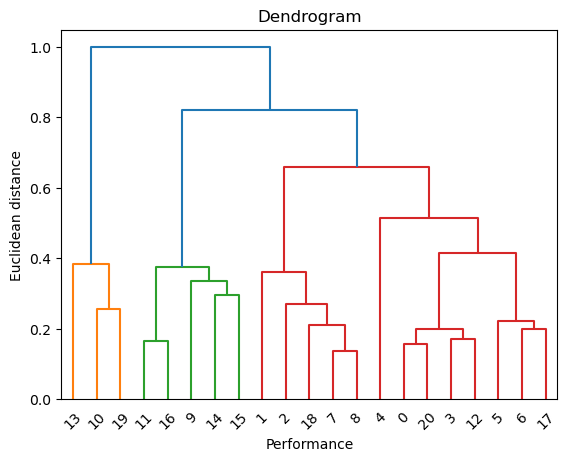

In [246]:
#Import the library for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Call the method dendrogram by using an object sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))  #Use ward method 
plt.title('Dendrogram')
plt.xlabel('Performance')
plt.ylabel('Euclidean distance')
plt.show()

In [248]:
# Create an object model
Hierarchical = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

# Train the model by calling fit() method
Hierarchical.fit(X)

AgglomerativeClustering(n_clusters=3)

In [250]:
# Add another column into the dataframe (df)
df_final['HR_labels'] = Hierarchical.labels_

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  ...       PC2       PC3  HR_labels    PC1_HR  \
Nationality              ...                                            
Australia          0.39  ... -0.152703  0.135892          0 -0.016969   
Austria            0.24  ... -0.078385 -0.179171          0 -0.033501   
Belgium            0.34  ... -0.140654  0.001907          0 -0.126347   
Canada             0.29  ... -0.135594  0.000061          0 -0.004618   
China              0.37  ...  0.140129 -0.153682          0  0.049324   

               PC2_HR    PC3_HR  DBSCAN_labels  DBSCAN_opt_labels    PC1_DB  \
Nationality                                                                   
Australia   -0.152703  0.135892              0                  0 -0.016969   
Austria     -0.078385 -0.179171              0                  0 -0.033501   
Belgium     -0.140654  0.001907              0                  0 -0.126347   
Canada      -0.135594  0.000061              0                  0 -0.004618   
China        0.140129 -0.153682              0                 -1  0.049324   

               PC2_DB  
Nationality            
Australia   -0.152703  
Austria     -0.078385  
Belgium     -0.140654  
Canada      -0.135594  
China        0.140129  

[5 rows x 29 columns]

In [252]:
#See how many points are on each cluster
df_final['HR_labels'].value_counts()

HR_labels
0    13
2     5
1     3
Name: count, dtype: int64

In [254]:
#Apply pca to reduce the dimension to 3 so it is easier to plot the clusters
pca_HR= PCA(n_components= 3)
X_pca_HR= pca_HR.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_HR[:,0]
df_final['PC2_HR']= X_pca_HR[:,1]
df_final['PC3_HR']= X_pca_HR[:,2]

In [256]:
total_var = pca_HR.explained_variance_ratio_.sum() * 100
total_var

76.61567724081738

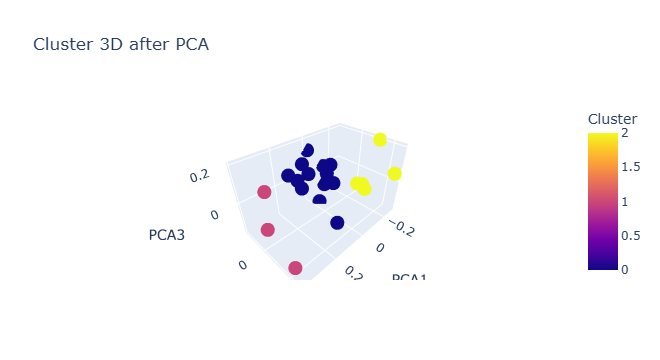

In [258]:
df_pca_HR=pd.DataFrame(X_pca_HR, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca_HR['Cluster']= df_final['HR_labels']
df_pca_HR['Nationality']= df_final.index

fig= px.scatter_3d(df_pca_HR, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [260]:
#Apply pca to reduce the dimension to 2 so it is easier to plot the clusters
pca_HR= PCA(n_components= 2)
X_pca_HR= pca_HR.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_HR[:,0]
df_final['PC2_HR']= X_pca_HR[:,1]

In [262]:
total_var = pca_HR.explained_variance_ratio_.sum() * 100
total_var

63.79743366317469

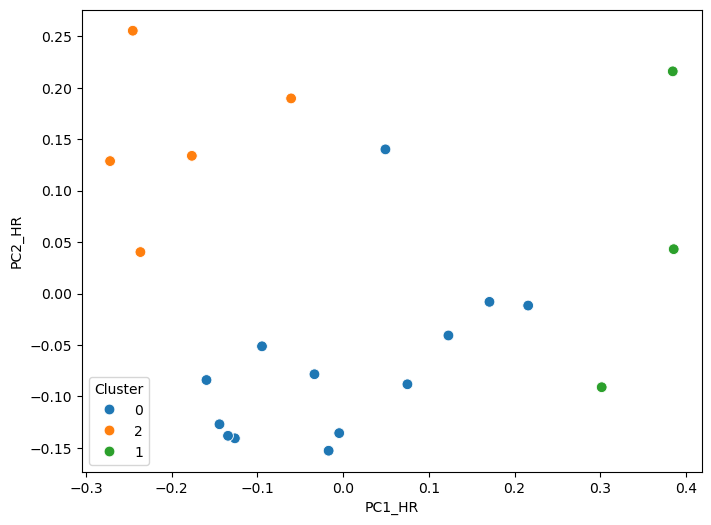

In [264]:
#Plot the clusters after pca
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='PC1_HR', y='PC2_HR', hue= df_final['HR_labels'].astype(str), s=60)
plt.legend(title= 'Cluster')
plt.show()

In [266]:
centroids_HR= X.columns
cluster_mean_HR= df_final.groupby('HR_labels')[centroids_HR].mean()

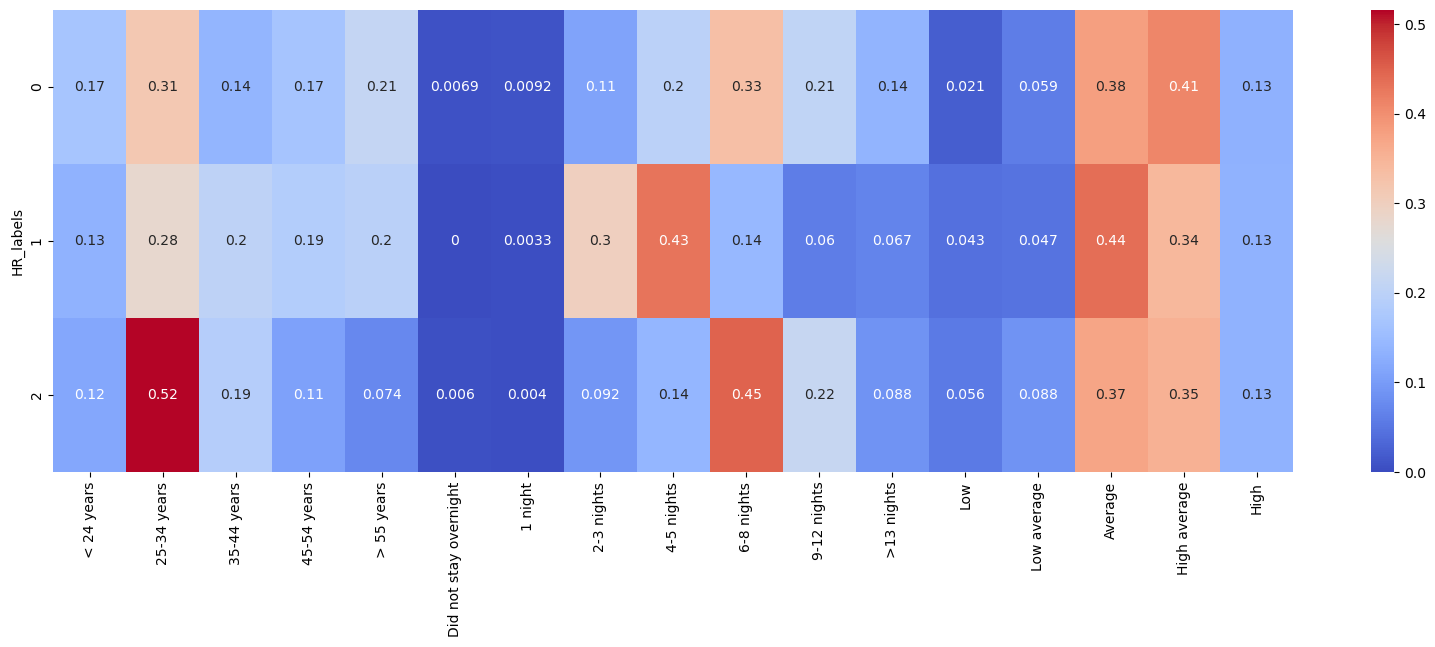

In [268]:
plt.figure(figsize=(20,6))
sns.heatmap(cluster_mean_HR, annot=True, cmap='coolwarm')
plt.show()

## DBSCAN

In [145]:
from sklearn.cluster import DBSCAN
# Create an object using dbscan
dbscan = DBSCAN()

# Train the model by calling fit() method
# We take epsilon is 0.5, and min_samples or minPoints is 5. Let’s visualize the results from this model
dbscan.fit(X)

DBSCAN()

In [147]:
# Add another column into the dataframe (df)
df_final['DBSCAN_labels'] = dbscan.labels_ 

# Display the dataframe records
df_final.head()

< 24 years  25-34 years  35-44 years  45-54 years  > 55 years  \
Nationality                                                                  
Australia          0.11         0.30         0.10         0.16        0.33   
Austria            0.28         0.32         0.07         0.24        0.09   
Belgium            0.14         0.37         0.12         0.19        0.18   
Canada             0.13         0.29         0.15         0.19        0.24   
China              0.42         0.34         0.10         0.06        0.09   

             Did not stay overnight  1 night  2-3 nights  4-5 nights  \
Nationality                                                            
Australia                      0.00     0.00        0.09        0.20   
Austria                        0.00     0.01        0.16        0.15   
Belgium                        0.00     0.00        0.05        0.12   
Canada                         0.03     0.01        0.16        0.15   
China                          0.00     0.00        0.11        0.30   

             6-8 nights  ...  High  KMeans_labels       PC1       PC2  \
Nationality              ...                                            
Australia          0.39  ...  0.18              0 -0.016969 -0.152703   
Austria            0.24  ...  0.15              0 -0.033501 -0.078385   
Belgium            0.34  ...  0.13              0 -0.126347 -0.140654   
Canada             0.29  ...  0.15              0 -0.004618 -0.135594   
China              0.37  ...  0.11              0  0.049324  0.140129   

                  PC3  HR_labels    PC1_HR    PC2_HR    PC3_HR  DBSCAN_labels  
Nationality                                                                    
Australia    0.135892          0 -0.016969 -0.152703  0.135892              0  
Austria     -0.179171          0 -0.033501 -0.078385 -0.179171              0  
Belgium      0.001907          0 -0.126347 -0.140654  0.001907              0  
Canada       0.000061          0 -0.004618 -0.135594  0.000061              0  
China       -0.153682          0  0.049324  0.140129 -0.153682              0  

[5 rows x 26 columns]

In [151]:
df_final['DBSCAN_labels'].unique()

array([0], dtype=int64)

In [153]:
from sklearn.neighbors import NearestNeighbors

# Initialise an object neigh by calling a method NearestNeighbors()
neigh = NearestNeighbors(n_neighbors = 2)

# Train the model by calling a method fit()
nbrs = neigh.fit(X)

# Store the distance and indices into distances and indices arrays
distances, indices = nbrs.kneighbors(X)

print(distances, indices)

[[1.49011612e-08 1.56843871e-01]
 [0.00000000e+00 2.48394847e-01]
 [2.10734243e-08 2.03715488e-01]
 [1.49011612e-08 1.72046505e-01]
 [0.00000000e+00 3.35111922e-01]
 [0.00000000e+00 2.02484567e-01]
 [1.49011612e-08 1.75783958e-01]
 [0.00000000e+00 1.37477271e-01]
 [1.49011612e-08 1.37477271e-01]
 [2.10734243e-08 3.07896086e-01]
 [0.00000000e+00 2.55147016e-01]
 [0.00000000e+00 1.64316767e-01]
 [0.00000000e+00 1.64924225e-01]
 [0.00000000e+00 2.62678511e-01]
 [0.00000000e+00 2.19544984e-01]
 [2.10734243e-08 2.96479342e-01]
 [0.00000000e+00 1.64316767e-01]
 [1.49011612e-08 1.99749844e-01]
 [0.00000000e+00 1.94164878e-01]
 [1.49011612e-08 2.55147016e-01]
 [0.00000000e+00 1.56843871e-01]] [[ 0 20]
 [ 1  3]
 [ 2  7]
 [ 3 12]
 [ 4  5]
 [ 5 20]
 [ 6 20]
 [ 7  8]
 [ 8  7]
 [ 9 15]
 [10 19]
 [11 16]
 [12  0]
 [13 19]
 [14 11]
 [15 14]
 [16 11]
 [17  6]
 [18  8]
 [19 10]
 [20  0]]


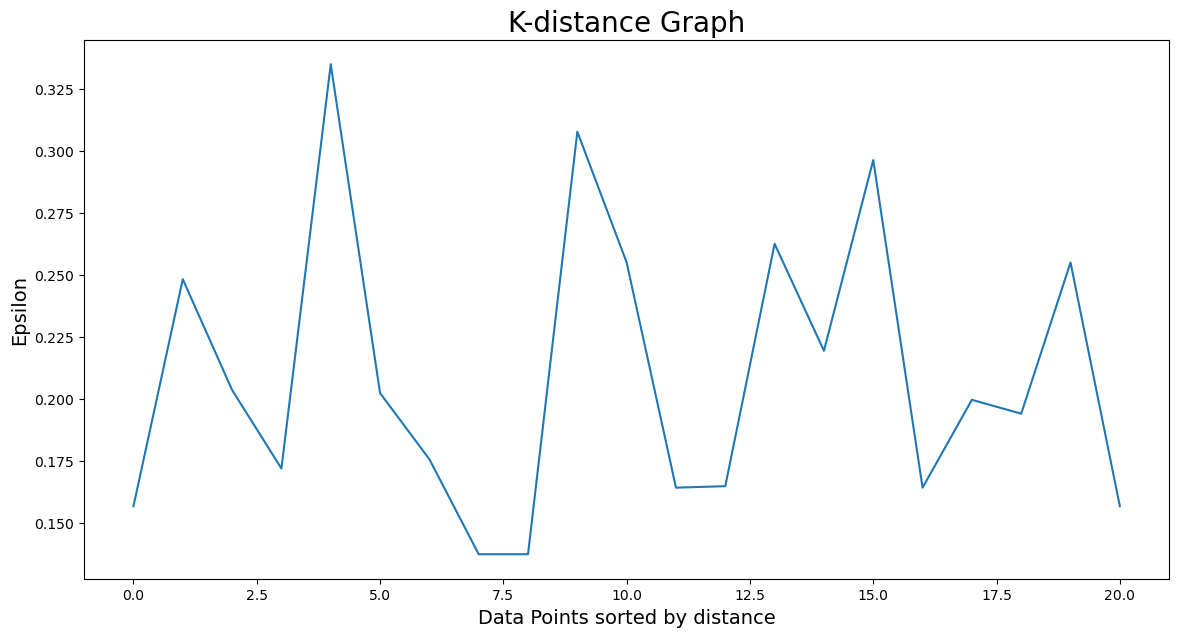

In [155]:
# Plotting K-distance Graph
# distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(figsize = (14, 7))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [157]:
db_param_options = [[0.25,2],[0.25,3],[0.25,4],[0.275,2],[0.275,3],[0.275,4],[0.3,2],[0.3,3],[0.3,4],[0.325,2],[0.325,3],[0.325,4]]
for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(X)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(X, db_clusters))

Eps:  0.25 Min Samples:  2
DBSCAN Clustering:  0.1971065307363114
Eps:  0.25 Min Samples:  3
DBSCAN Clustering:  0.1971065307363114
Eps:  0.25 Min Samples:  4
DBSCAN Clustering:  0.1971065307363114
Eps:  0.275 Min Samples:  2
DBSCAN Clustering:  0.1980107406428611
Eps:  0.275 Min Samples:  3
DBSCAN Clustering:  0.1980107406428611
Eps:  0.275 Min Samples:  4
DBSCAN Clustering:  0.1971065307363114
Eps:  0.3 Min Samples:  2
DBSCAN Clustering:  0.14914950240272468
Eps:  0.3 Min Samples:  3
DBSCAN Clustering:  0.14914950240272468
Eps:  0.3 Min Samples:  4
DBSCAN Clustering:  0.22723518318776173
Eps:  0.325 Min Samples:  2
DBSCAN Clustering:  0.11555639758943972
Eps:  0.325 Min Samples:  3
DBSCAN Clustering:  0.11555639758943972
Eps:  0.325 Min Samples:  4
DBSCAN Clustering:  0.11555639758943972


In [159]:
# Generate clusters using DBSCAN
dbscan_opt = DBSCAN(eps = 0.3, min_samples = 4)
db_clusters = dbscan_opt.fit_predict(X)

In [161]:
# Add another column into the dataframe (df)
df_final['DBSCAN_opt_labels'] = dbscan_opt.labels_

# Display the counts by labels
df_final['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
 0    17
-1     4
Name: count, dtype: int64

In [163]:
#Apply pca to reduce the dimension to 3 so it is easier to plot the clusters
pca_DB= PCA(n_components= 3)
X_pca_DB= pca_DB.fit_transform(X)
#Create the two features
df_final['PC1_HR']= X_pca_DB[:,0]
df_final['PC2_HR']= X_pca_DB[:,1]
df_final['PC3_HR']= X_pca_DB[:,2]

In [165]:
total_var = pca_DB.explained_variance_ratio_.sum() * 100
total_var

76.61567724081738

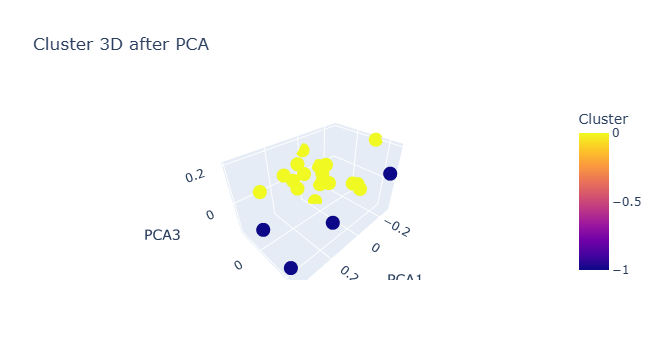

In [167]:
df_pca_DB=pd.DataFrame(X_pca_DB, columns=['PCA1', 'PCA2', 'PCA3'], index= df_final.index)
df_pca_DB['Cluster']= df_final['DBSCAN_opt_labels']
df_pca_DB['Nationality']= df_final.index

fig= px.scatter_3d(df_pca_DB, x='PCA1', y='PCA2', z='PCA3', color='Cluster', hover_name='Nationality', title= 'Cluster 3D after PCA')
fig.show()

In [177]:
#Apply pca to reduce the dimension to 2 so it is easier to plot the clusters
pca_DB= PCA(n_components= 2)
X_pca_DB= pca_DB.fit_transform(X)
#Create the two features
df_final['PC1_DB']= X_pca_DB[:,0]
df_final['PC2_DB']= X_pca_DB[:,1]

In [179]:
total_var = pca_DB.explained_variance_ratio_.sum() * 100
total_var

63.79743366317469

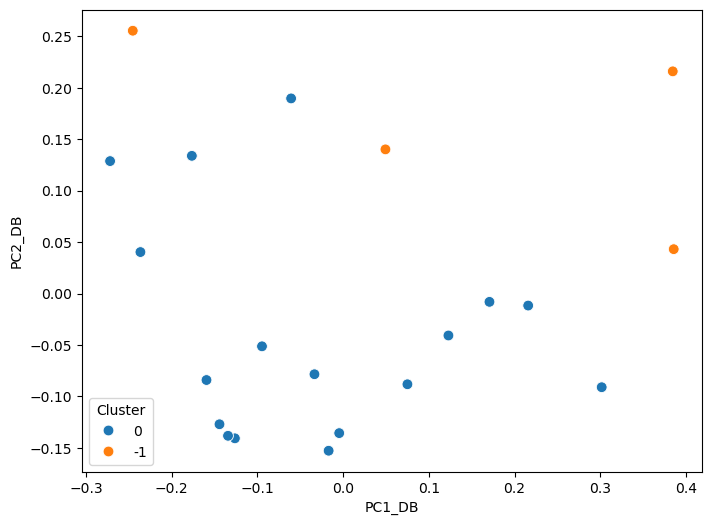

In [181]:
#Plot the clusters after pca
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_final, x='PC1_DB', y='PC2_DB', hue= df_final['DBSCAN_opt_labels'].astype(str), s=60)
plt.legend(title= 'Cluster')
plt.show()

In [169]:
centroids_DB= X.columns
cluster_mean_DB= df_final.groupby('DBSCAN_opt_labels')[centroids_DB].mean()

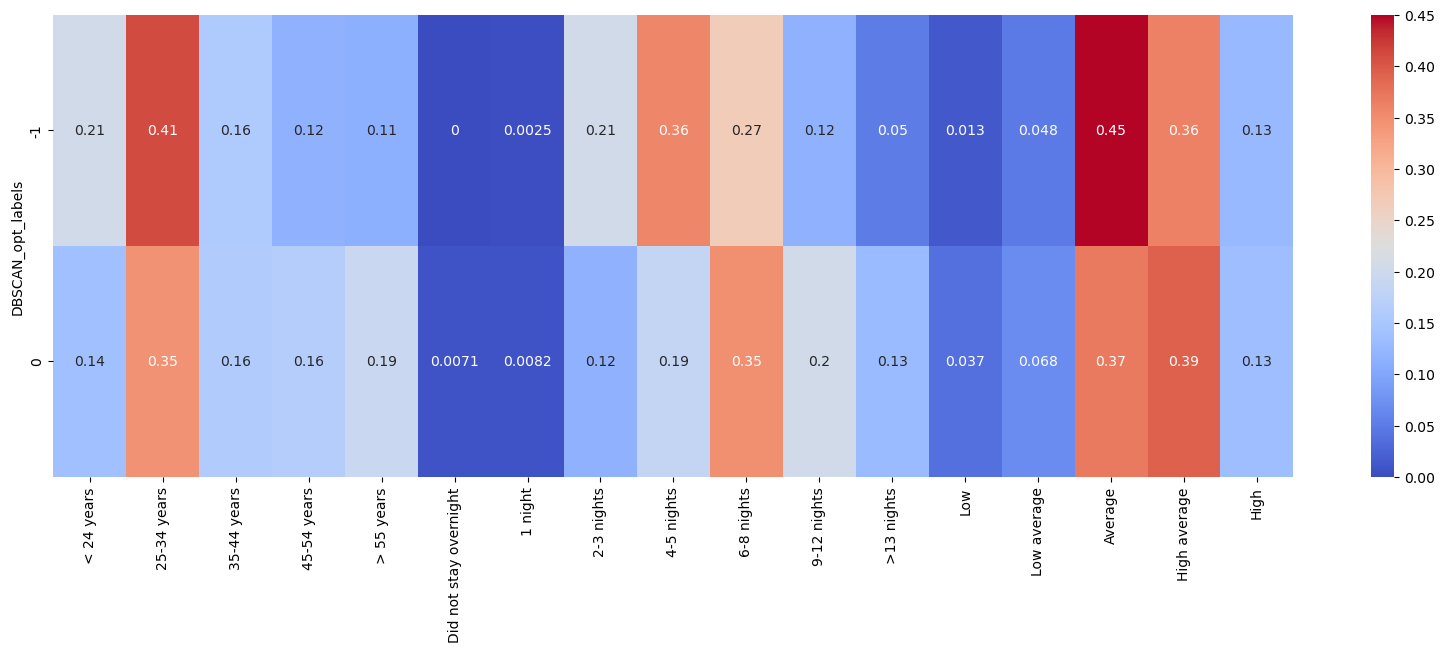

In [171]:
plt.figure(figsize=(20,6))
sns.heatmap(cluster_mean_DB, annot=True, cmap='coolwarm')
plt.show()